In [1]:
import warnings
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud  # Word visualization
import matplotlib.pyplot as plt  # Plotting properties
import seaborn as sns  # Plotting properties
from sklearn.feature_extraction.text import CountVectorizer  # Data transformation
from sklearn.model_selection import train_test_split  # Data testing
from sklearn.linear_model import LogisticRegression  # Prediction Model

# Comparison between real and predicted
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import (
    LabelEncoder,
)  # Variable encoding and decoding for XGBoost
import re  # Regular expressions
import nltk
from nltk import word_tokenize
from pathlib import Path
import numpy as np
from collections import Counter
from pathlib import Path

nltk.download("stopwords")
nltk.download("punkt")

# Znalezienie root projectu
current_path = Path().cwd()
root_project_path = current_path.parent.parent  # Przechodzimy dwa poziomy w górę
datasets_path = root_project_path / 'datasets'

# Construct the path to the CSV file
csv_path_train = datasets_path / "twitter_training.csv"
csv_path_val = datasets_path / "twitter_validation.csv"

# Read the CSV file
train = pd.read_csv(csv_path_train, encoding='utf-8', header=None)
val = pd.read_csv(csv_path_val, encoding='utf-8', header=None)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/konradkon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/konradkon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train.columns=['id','type','sentiment','text']
train.head()

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
val.columns=['id','type','sentiment','text']
val.head()

,id,type,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [4]:
train_data=train
train_data

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [5]:
val_data=val
val_data

,id,type,sentiment,text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [6]:
train.sentiment.value_counts()

sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

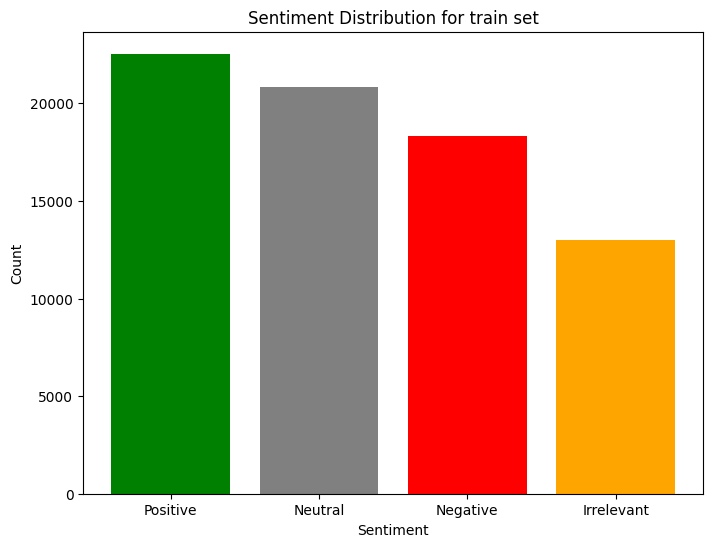

In [7]:
sentiment_counts = train['sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
colors = ['green', 'gray', 'red', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for train set')
plt.show()

In [8]:
val.sentiment.value_counts()

sentiment
Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: count, dtype: int64

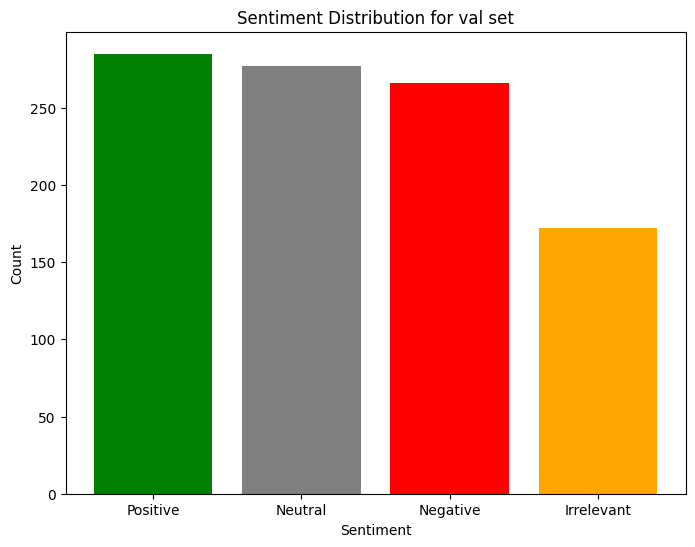

In [9]:
sentiment_counts = val['sentiment'].value_counts()

labels = ['Positive', 'Neutral', 'Negative', 'Irrelevant']
colors = ['green', 'gray', 'red', 'orange']

plt.figure(figsize=(8, 6))
plt.bar(labels, sentiment_counts, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution for val set')
plt.show()

Data cleaning: Rows containing missing values in training and test data are deleted.

In [10]:
train_data.isna().sum().sum()

686

In [11]:
train_data = train_data.dropna()

In [12]:
train_data.isna().sum().sum()

0

In [13]:
train_data

,id,type,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...,...
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...


In [14]:
val_data.isna().sum().sum()

0

In [15]:
val_data = val_data.dropna()

In [16]:
val_data.isna().sum().sum()

0

Preparation of text data: Text is converted into a form suitable for analysis by reducing letters, removing special characters using regular expressions.

In [17]:
#Text transformation
train_data["lower"]=train_data.text.str.lower() #lowercase
train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
train_data["lower"] = train_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex
#train_data["lower"] = train_data.lower.apply(lambda x: re.sub(r"\W", " ", x))
val_data["lower"]=val_data.text.str.lower() #lowercase
val_data["lower"]=[str(data) for data in val_data.lower] #converting all to string
val_data["lower"]=val_data.lower.apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x)) #regex

/tmp/ipykernel_83534/3438242771.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=train_data.text.str.lower() #lowercase
/tmp/ipykernel_83534/3438242771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["lower"]=[str(data) for data in train_data.lower] #converting all to string
/tmp/ipykernel_83534/3438242771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [18]:
train_data.head()

,id,type,sentiment,text,lower
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...


Word cloud creation: A word cloud is created for each sentiment class (positive, neutral, negative) based on the processed texts.

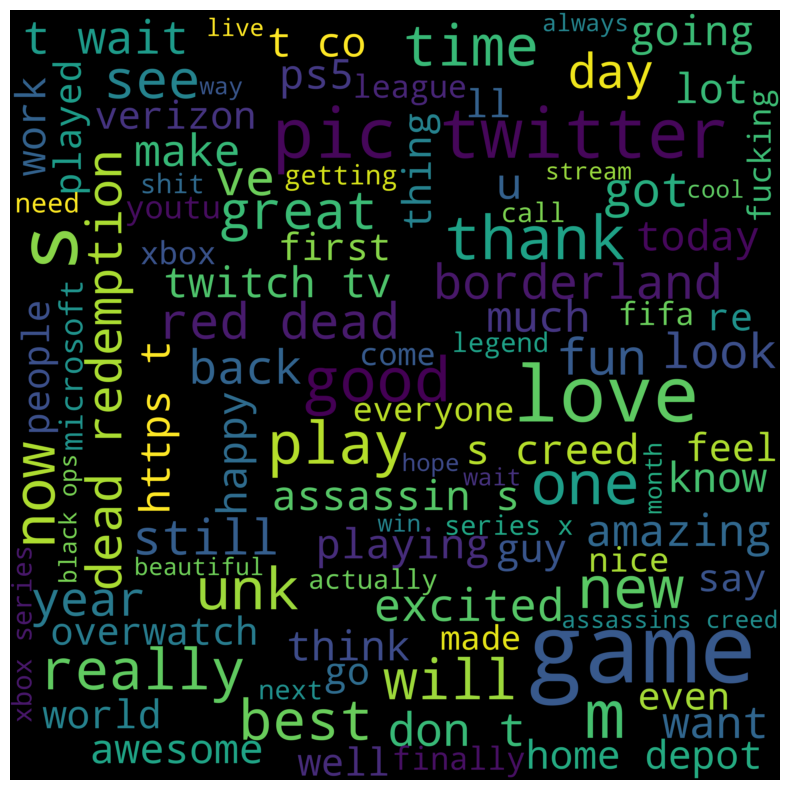

In [19]:
#positive
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Positive"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

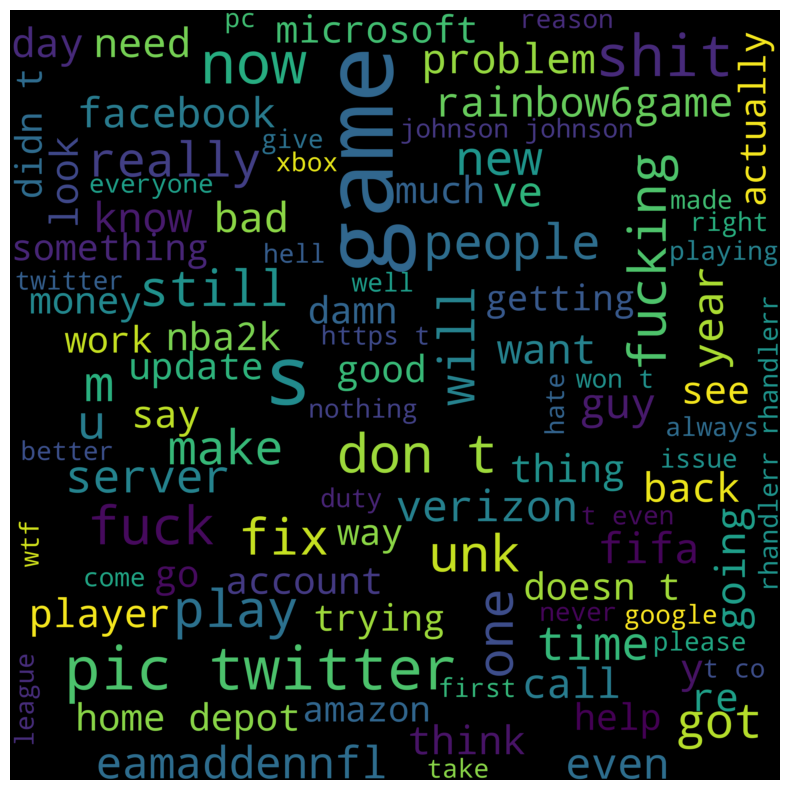

In [20]:
#neutral
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Negative"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

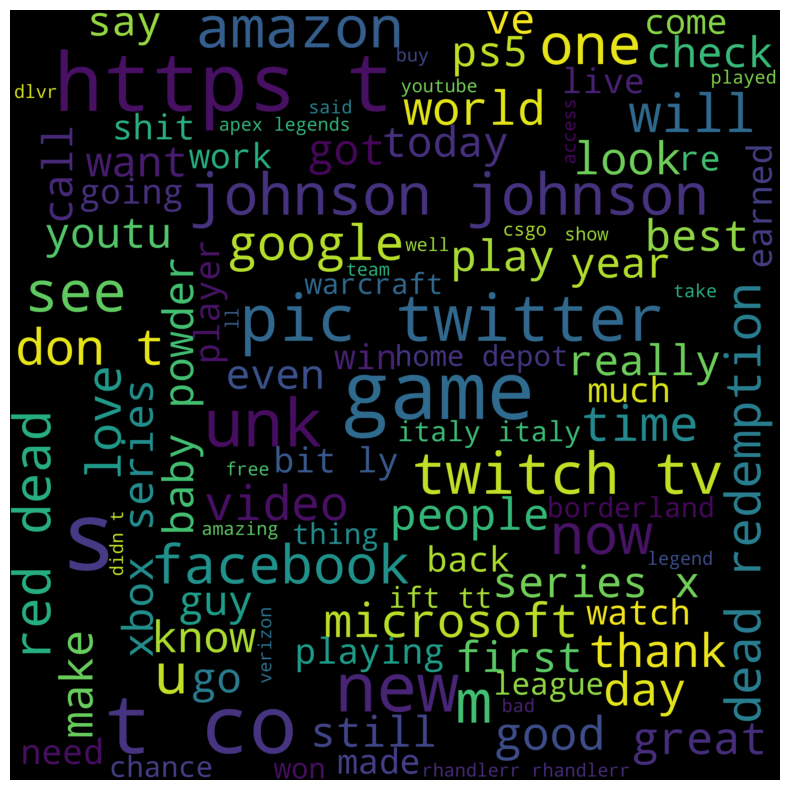

In [21]:
#negative
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Neutral"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

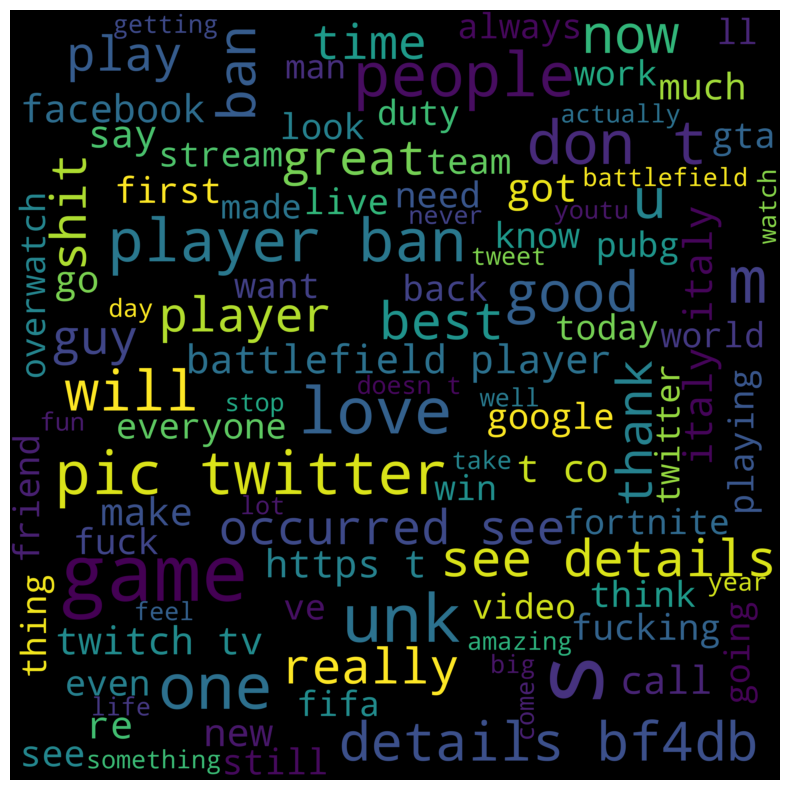

In [22]:
#irrelevant
word_cloud_text = ''.join(train_data[train_data["sentiment"]=="Irrelevant"].lower)
#Creation of wordcloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)
#Figure properties
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [23]:
#Count information per category
plot1=train_data.groupby(by=["type","sentiment"]).count().reset_index()
plot1.head()

,type,sentiment,id,text,lower
0,Amazon,Irrelevant,186,186,186
1,Amazon,Negative,575,575,575
2,Amazon,Neutral,1207,1207,1207
3,Amazon,Positive,308,308,308
4,ApexLegends,Irrelevant,192,192,192


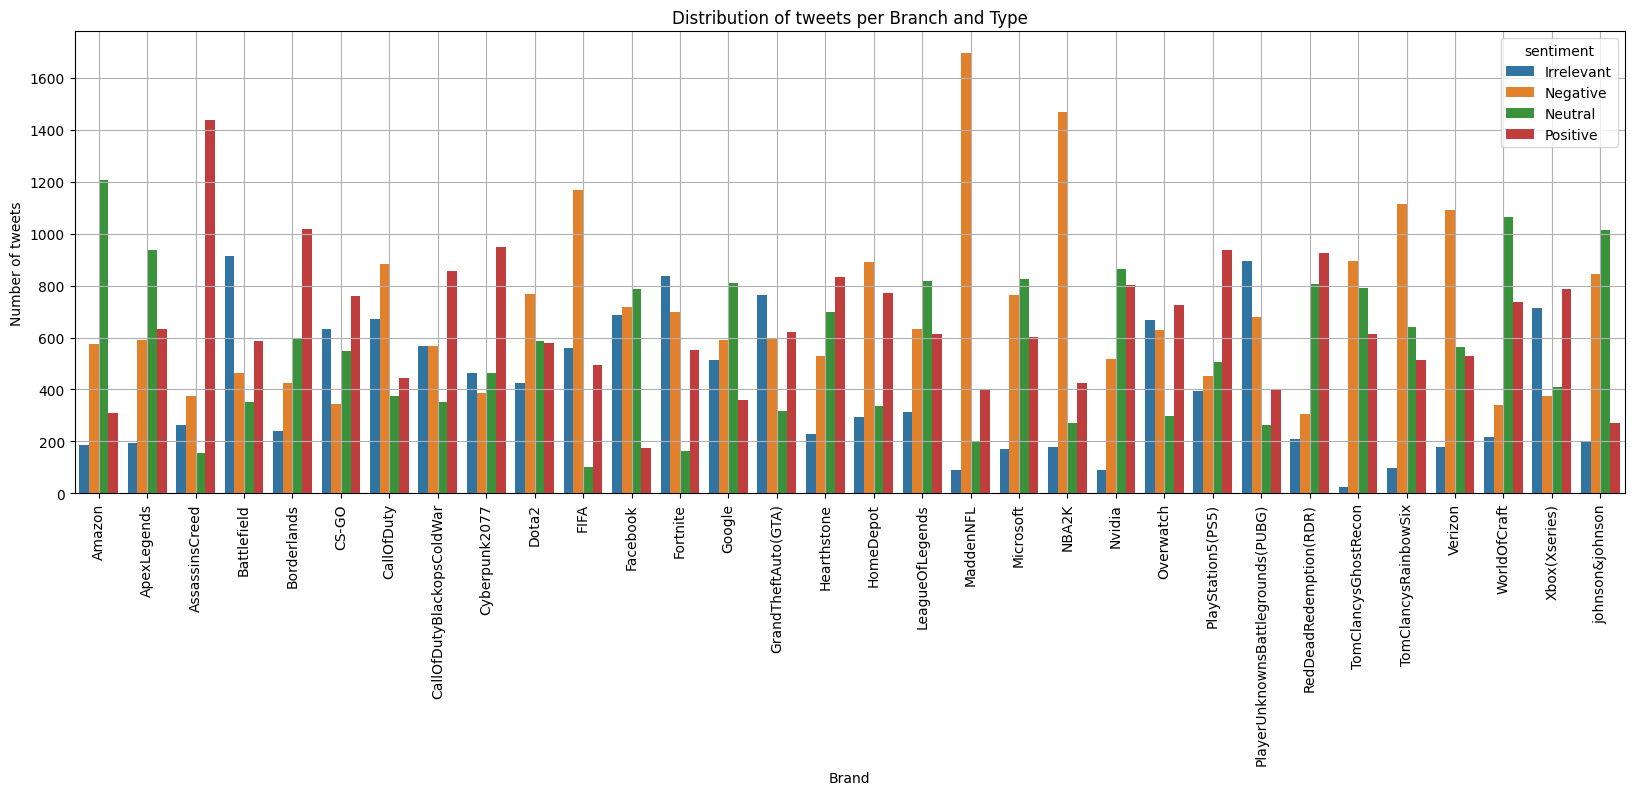

In [24]:
#Figure of comparison per branch
plt.figure(figsize=(20,6))
sns.barplot(data=plot1,x="type",y="id",hue="sentiment")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [25]:
# Tokenization
train_data_plot = train_data
train_data_plot['word_count'] = train_data['lower'].apply(lambda x: len(str(x).split()))
train_data_plot['avg_word_length'] = train_data['lower'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))
train_data_plot['unique_words'] = train_data['lower'].apply(lambda x: len(set(str(x).split())))

# Descriptive Statistics
train_data.describe()

/tmp/ipykernel_83534/2957645586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_plot['word_count'] = train_data['lower'].apply(lambda x: len(str(x).split()))
/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_83534/2957645586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,id,word_count,avg_word_length,unique_words
count,73996.000000,73996.000000,73698.000000,73996.000000
mean,6430.279231,19.499513,4.427189,17.643265
std,3737.660027,14.334973,3.785826,11.998997
min,1.000000,0.000000,1.000000,0.000000
25%,3194.000000,8.000000,3.846154,8.000000
50%,6417.500000,16.000000,4.285714,15.000000
75%,9595.000000,27.000000,4.805556,25.000000
max,13200.000000,166.000000,396.000000,65.000000


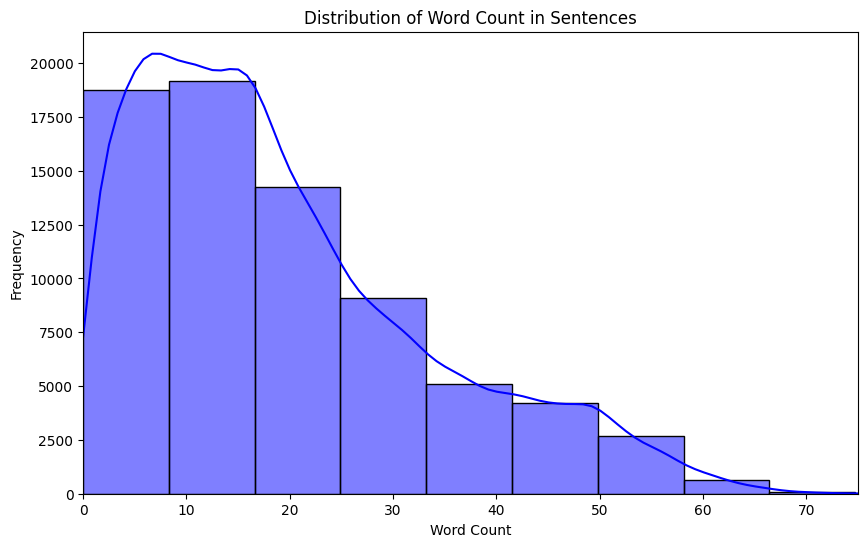

In [26]:
# Visualization of Descriptive Statistics
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['word_count'], kde=True, color='blue', bins=20)
plt.title('Distribution of Word Count in Sentences')
plt.xlabel('Word Count')
plt.xlim(0, 75)
plt.ylabel('Frequency')
plt.show()

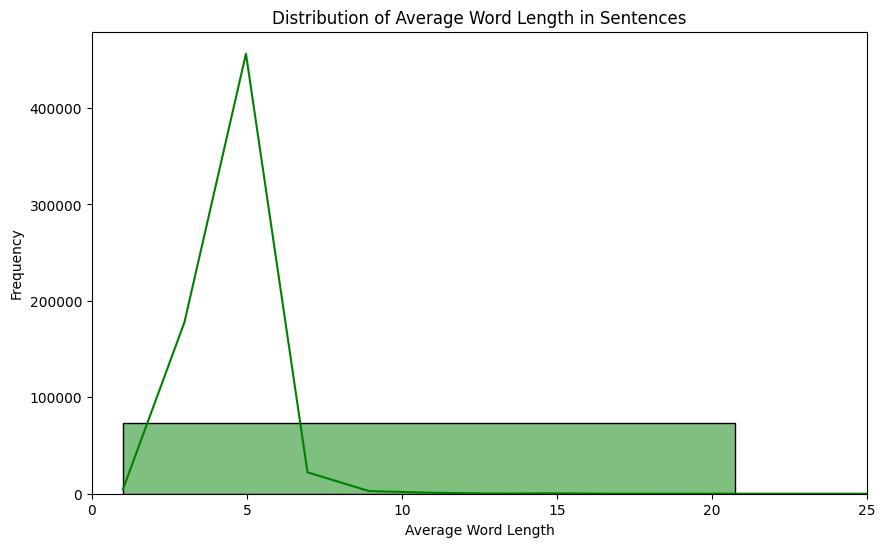

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['avg_word_length'], kde=True, color='green', bins=20)
plt.xlim(0, 25) 
plt.title('Distribution of Average Word Length in Sentences')
plt.xlabel('Average Word Length')
plt.ylabel('Frequency')
plt.show()

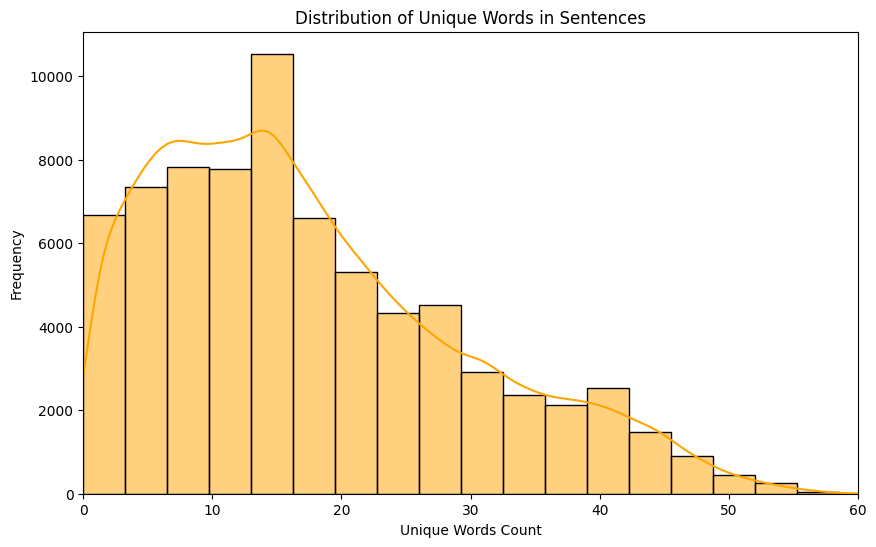

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['unique_words'], kde=True, color='orange', bins=20)
plt.title('Distribution of Unique Words in Sentences')
plt.xlabel('Unique Words Count')
plt.xlim(0, 60) 
plt.ylabel('Frequency')
plt.show()

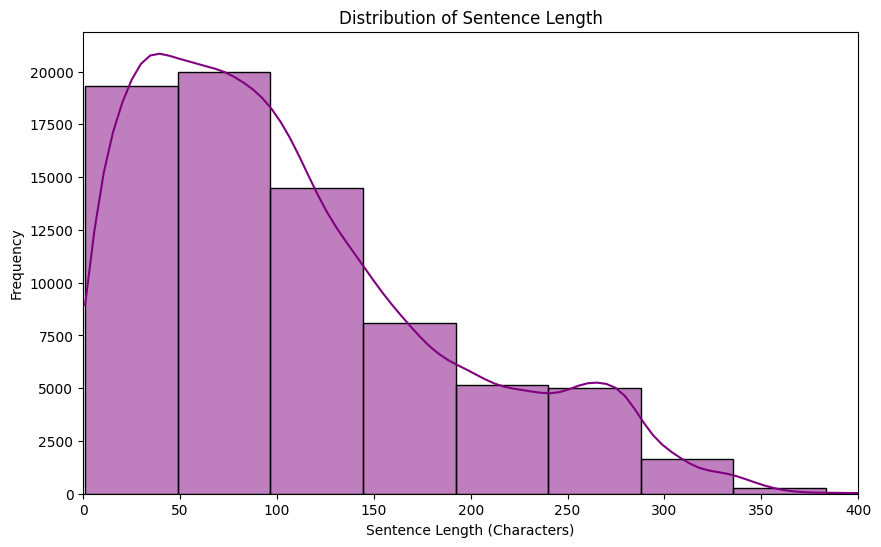

In [29]:
# Distribution of Sentence Length
plt.figure(figsize=(10, 6))
sns.histplot(train_data_plot['text'].apply(len), kde=True, color='purple', bins=20)
plt.title('Distribution of Sentence Length')
plt.xlabel('Sentence Length (Characters)')
plt.xlim(0, 400) 
plt.ylabel('Frequency')
plt.show()

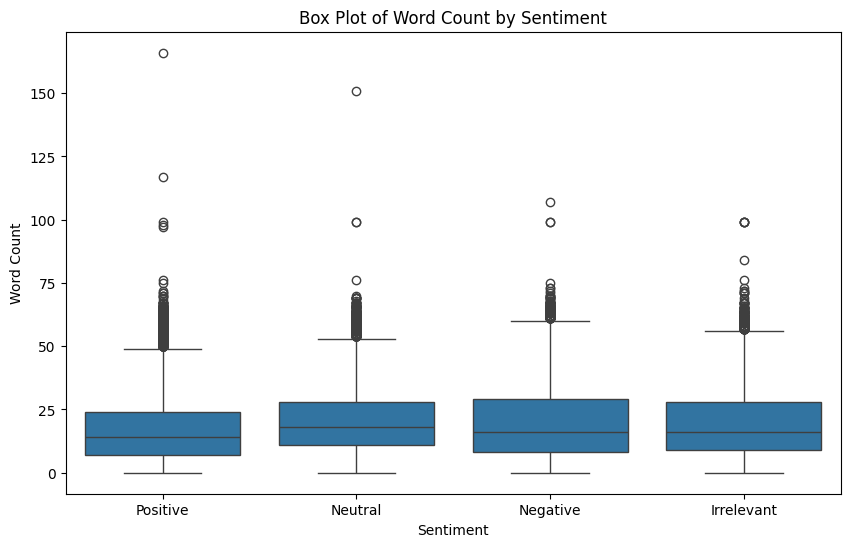

In [30]:
# Box Plot of Word Count by Sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data_plot, x='sentiment', y='word_count')
plt.title('Box Plot of Word Count by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

Splitting text into tokens: Text is divided into tokens (words or parts of words).

In [31]:
#Text splitting
tokens_text = [word_tokenize(str(word)) for word in train_data.lower]
#Unique word counter
tokens_counter = [item for sublist in tokens_text for item in sublist]
print("Number of tokens: ", len(set(tokens_counter)))

Number of tokens:  30435


In [32]:
tokens_text[23]

['that',
 'was',
 'the',
 'first',
 'borderlands',
 'session',
 'in',
 'a',
 'hot',
 'row',
 'where',
 'i',
 'actually',
 'had',
 'a',
 'really',
 'bad',
 'combat',
 'experience',
 'i',
 'did',
 'some',
 'really',
 'good',
 'kills']

In [33]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Bag of Words (BoW): The text is represented as a bag of words, a compilation of all the unique words in the text along with their count.

In [34]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, 
    ngram_range=(1, 1) 
)

Splitting the data into training and test sets: the data is split into training and test sets to evaluate the effectiveness of the model.

In [35]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=43)

In [36]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [37]:
X_test_bow

<14800x29017 sparse matrix of type '<class 'numpy.int64'>'
	with 159872 stored elements in Compressed Sparse Row format>

In [38]:
#Labels for train and test encoding
y_train_bow = reviews_train['sentiment']
y_test_bow = reviews_test['sentiment']

In [39]:
#Total of registers per category
y_test_bow.value_counts() / y_test_bow.shape[0]

sentiment
Negative      0.301014
Positive      0.281014
Neutral       0.243851
Irrelevant    0.174122
Name: count, dtype: float64

Learning the model: Using a logistic regression algorithm, the model is learned on training data.

In [40]:
# Logistic regression
model1 = LogisticRegression(C=1, solver="liblinear",max_iter=150)
model1.fit(X_train_bow, y_train_bow)
# Prediction
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  80.32432432432432


/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [41]:
#print('Predicted labels: ', test_pred[:232])

In [42]:
print("Classification Report for Test Data:")
print(classification_report(y_test_bow, test_pred))

Classification Report for Test Data:
              precision    recall  f1-score   support

  Irrelevant       0.85      0.65      0.74      2577
    Negative       0.80      0.84      0.82      4455
     Neutral       0.86      0.79      0.82      3609
    Positive       0.74      0.87      0.80      4159

    accuracy                           0.80     14800
   macro avg       0.82      0.79      0.80     14800
weighted avg       0.81      0.80      0.80     14800



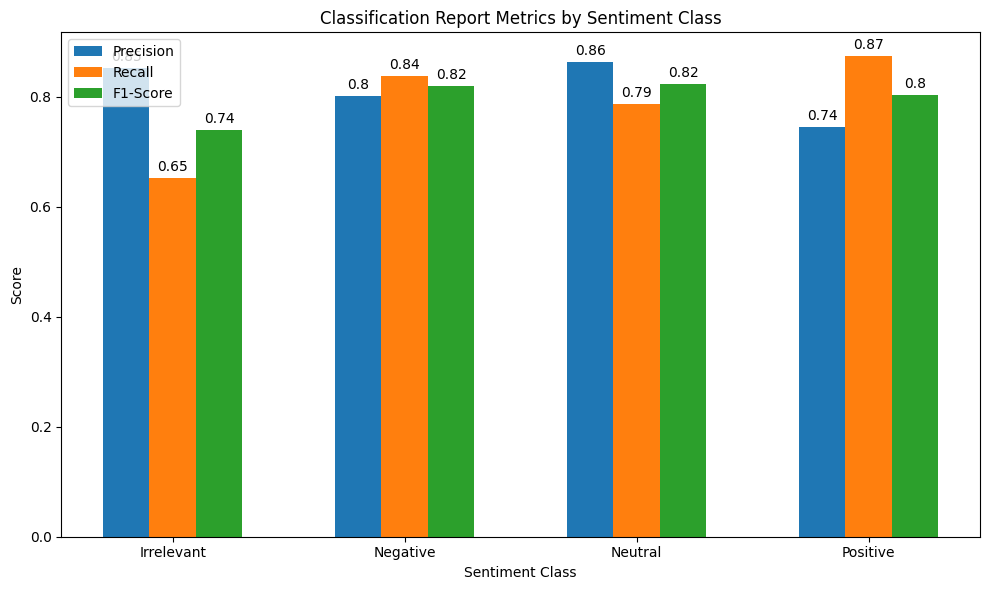

In [43]:
# Generate Classification Report
report = classification_report(y_test_bow, test_pred, output_dict=True)

# Extract metrics for each class
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'
precision = [report[class_]['precision'] for class_ in classes]
recall = [report[class_]['recall'] for class_ in classes]
f1_score = [report[class_]['f1-score'] for class_ in classes]

# Plotting
x = np.arange(len(classes))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
precision_bar = ax.bar(x - width, precision, width, label='Precision')
recall_bar = ax.bar(x, recall, width, label='Recall')
f1_score_bar = ax.bar(x + width, f1_score, width, label='F1-Score')

# Add labels, title, and legend
ax.set_xlabel('Sentiment Class')
ax.set_ylabel('Score')
ax.set_title('Classification Report Metrics by Sentiment Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Add value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(precision_bar)
add_value_labels(recall_bar)
add_value_labels(f1_score_bar)

plt.tight_layout()
plt.show()


In [44]:
#Validation data
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['sentiment']

In [45]:
X_val_bow

<1000x29017 sparse matrix of type '<class 'numpy.int64'>'
	with 12914 stored elements in Compressed Sparse Row format>

Model evaluation: The effectiveness of the model is evaluated on test data using an accuracy (precision) metric.

In [46]:
val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, val_res) * 100)

Accuracy:  90.4


In [47]:
#n-gram of 4 words
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    ngram_range=(1,4)
)
#Data labeling
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
X_test_bow = bow_counts.transform(reviews_test.lower)
X_val_bow = bow_counts.transform(val_data.lower)

/home/konradkon/.cache/pypoetry/virtualenvs/sentimaniac-rdPPxowD-py3.11/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [48]:
X_train_bow

<59196x1430467 sparse matrix of type '<class 'numpy.int64'>'
	with 4152319 stored elements in Compressed Sparse Row format>

In [49]:
model2 = LogisticRegression(C=0.9, solver="liblinear",max_iter=1500)
# Logistic regression
model2.fit(X_train_bow, y_train_bow)
# Prediction
test_pred_2 = model2.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred_2) * 100)

Accuracy:  91.56756756756756


In [50]:
y_val_bow = val_data['sentiment']
Val_pred_2 = model2.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_pred_2) * 100)

Accuracy:  98.5


Sentiment prediction: The predict_sentiment() function takes a sentence as input, processes it and predicts its sentiment using a learned model.

In [51]:
def predict_sentiment(model, bow_counts, sentence):
    # Preprocess input sentence
    processed_sentence = re.sub('[^A-Za-z0-9 ]+', ' ', sentence.lower())
    #print(processed_sentence)
    # Transform sentence using the same CountVectorizer
    transformed_sentence = bow_counts.transform([processed_sentence])
    #print(transformed_sentence)
    # Predict sentiment
    prediction = model2.predict(transformed_sentence)
    #print(prediction)
    if prediction == "Positive":
        return "Positive"
    elif prediction == "Neutral":
        return "Neutral"
    elif prediction == "Negative":
        return "Negative"
    else:
        return "Irrelevant"

In [60]:
test_sentence = input("Sentence: ")
print(f"Sentiment for '{test_sentence}':", predict_sentiment(model2, bow_counts, test_sentence))

Sentence:  I'm fine thanks


Sentiment for 'I'm fine thanks': Positive


## Dla grupy 02b do kolejnych zajęć:
- (1) Dopasowanie rozkładów statystycznych odpowiednio modelujących analizowane dane (do wykresów dopasować model statystyczny)
- (2) Przetestować rózne typy wizualizacji danych, do (wybranych) danych z wykresy "Disrtibution of tweets per branch and type): https://seaborn.pydata.org/api.html
![](https://www.researchgate.net/profile/Carlos-Castillo-Chavez/publication/241697828/figure/fig5/AS:646087262105607@1531050615979/Similar-to-Fig-4-but-it-is-for-the-Poisson-distributions-with-parameter-l-The-curves.png)

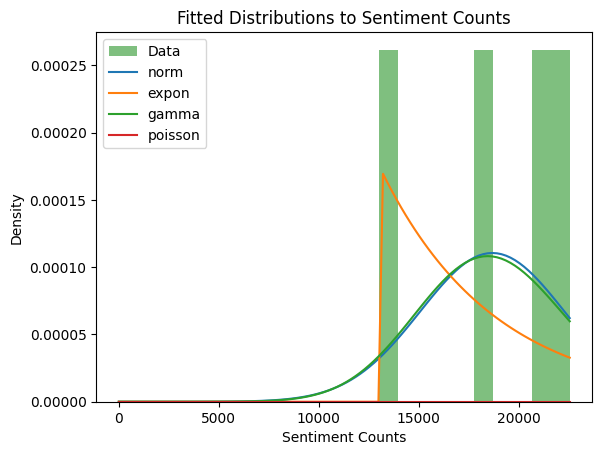

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Dopasuj rozkłady do danych
def fit_distributions(data):
    distributions = ['norm', 'expon', 'gamma']  # Lista rozkładów do dopasowania
    results = {}  # Słownik do przechowywania wyników dopasowania

    for distribution in distributions:
        dist = getattr(stats, distribution)  # Pobierz funkcję rozkładu z scipy.stats
        params = dist.fit(data)  # Dopasuj rozkład do danych
        results[distribution] = params  # Zapisz parametry dopasowanego rozkładu

    # Obsłuż ręcznie rozkład Poissona
    lambda_poisson = np.mean(data)  # Oblicz średnią wartość dla rozkładu Poissona
    results['poisson'] = lambda_poisson  # Zapisz parametr lambda dla rozkładu Poissona
    return results

# Pobierz liczby sentymentów
sentiment_counts = train['sentiment'].value_counts().values

# Dopasuj rozkłady
fitted_distributions = fit_distributions(sentiment_counts)

# Narysuj dane i dopasowane rozkłady
x = np.linspace(0, max(sentiment_counts), 100)  # Wygeneruj 100 wartości równomiernie rozmieszczonych między 0 a maksymalną wartością liczby sentymentów
plt.hist(sentiment_counts, bins=10, density=True, alpha=0.5, color='g', label='Data')  # Narysuj histogram danych

for dist_name, params in fitted_distributions.items():
    if (dist_name == 'poisson'):
        plt.plot(x, stats.poisson.pmf(x, params), label=dist_name)  # Narysuj rozkład Poissona
    else:
        dist = getattr(stats, dist_name)  # Pobierz funkcję rozkładu z scipy.stats
        plt.plot(x, dist.pdf(x, *params[:-2], loc=params[-2], scale=params[-1]), label=dist_name)  # Narysuj dopasowany rozkład

plt.legend()  # Dodaj legendę
plt.title('Fitted Distributions to Sentiment Counts')  # Dodaj tytuł wykresu
plt.xlabel('Sentiment Counts')  # Dodaj etykietę osi X
plt.ylabel('Density')  # Dodaj etykietę osi Y
plt.show()  # Wyświetl wykres

## Analiza wykresu:

Wykres przedstawia histogram liczby sentymentów oraz dopasowane do nich rozkłady: normalny (norm), wykładniczy (expon), gamma (gamma) oraz Poissona (poisson). Histogram pokazuje rozkład rzeczywistych danych sentymentów.

- **Rozkład normalny (niebieski):** Rozkład normalny wydaje się nie być dobrym dopasowaniem do danych, ponieważ ma szerszy rozkład i większą gęstość w obszarach, gdzie dane tego nie pokazują.
- **Rozkład wykładniczy (pomarańczowy):** Rozkład wykładniczy również nie jest idealnym dopasowaniem, ponieważ przewiduje wysoką gęstość na początku, co nie jest zgodne z danymi.
- **Rozkład gamma (zielony):** Rozkład gamma lepiej pasuje do danych, szczególnie w zakresie wysokich wartości liczby sentymentów.
- **Rozkład Poissona (czerwony):** Rozkład Poissona jest bardzo bliski zeru przez większość zakresu danych, co również wskazuje, że nie jest najlepszym dopasowaniem do tych danych.

**Wniosek:**
Rozkład gamma wydaje się być najlepszym dopasowaniem do liczby sentymentów w danych, podczas gdy rozkłady normalny, wykładniczy i Poissona nie pasują dobrze do rzeczywistego rozkładu danych.

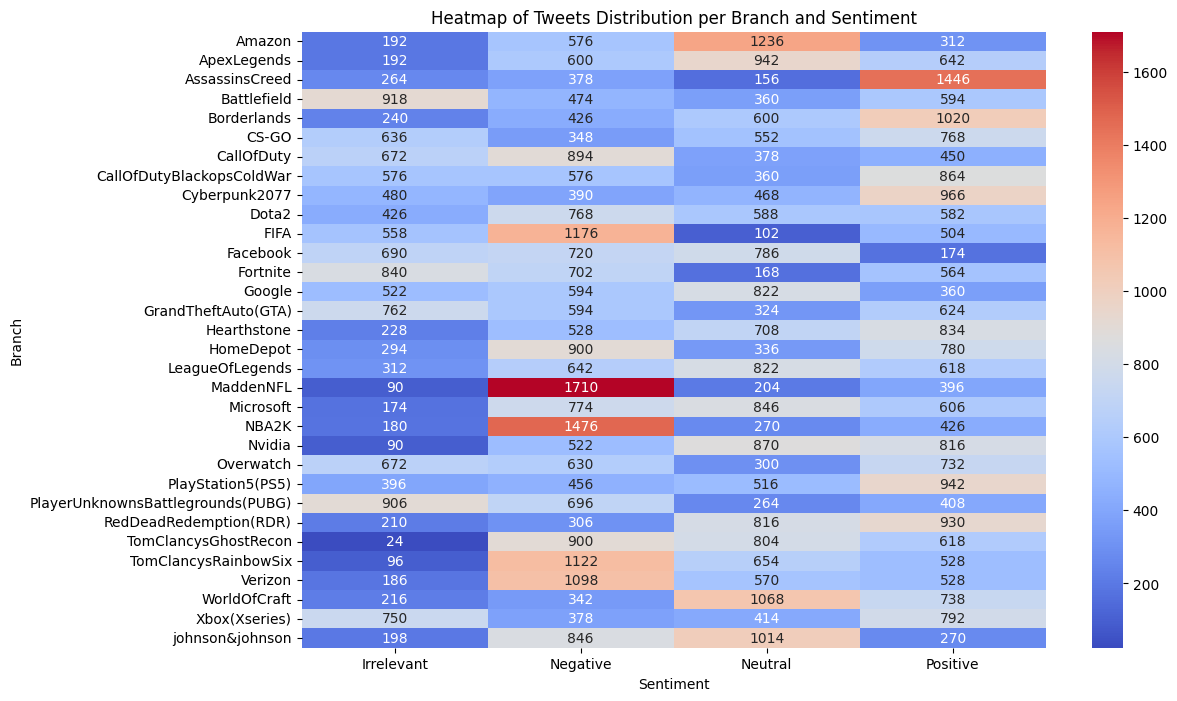

In [53]:
# Stwórz heatmapę
plt.figure(figsize=(12, 8))  # Ustaw rozmiar wykresu
heatmap_data = train.pivot_table(index='type', columns='sentiment', values='id', aggfunc='count', fill_value=0)  # Stwórz tabelę przestawną z liczbą tweetów na podstawie typu i sentymentu
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')  # Narysuj heatmapę z wartościami liczbowymi, używając skali kolorów 'coolwarm'
plt.title('Heatmap of Tweets Distribution per Branch and Sentiment')  # Dodaj tytuł wykresu
plt.xlabel('Sentiment')  # Dodaj etykietę osi X
plt.ylabel('Branch')  # Dodaj etykietę osi Y
plt.show()  # Wyświetl wykres

## Analiza wykresu:
Wykres przedstawia heatmapę dystrybucji tweetów według typu (branch) i sentymentu. Oto kilka kluczowych obserwacji:

1. **Irrelevant (Nierelewantne):**
   - Największe wartości widoczne są dla takich typów jak `Battlefield`, `CallOfDuty`, `CS-GO`, `Fortnite` i `PlayStation5(PS5)`. 
   - Typy `Amazon`, `ApexLegends`, `AssassinsCreed` oraz `HomeDepot` mają relatywnie niską liczbę tweetów w tej kategorii.

2. **Negative (Negatywne):**
   - Typ `MaddenNFL` dominuje w kategorii negatywnych tweetów z wartością 1710, co jest znacznie wyższe niż w innych typach.
   - `PlayerUnknownsBattlegrounds(PUBG)` oraz `TomClancysRainbowSix` również mają wysokie wartości w tej kategorii.

3. **Neutral (Neutralne):**
   - `FIFA`, `NBA2K` oraz `CallOfDuty` mają znaczne wartości w kategorii neutralnych tweetów.
   - `Cyberpunk2077`, `Google` i `Hearthstone` mają umiarkowane wartości.

4. **Positive (Pozytywne):**
   - `AssassinsCreed`, `Cyberpunk2077` i `LeagueOfLegends` wyróżniają się wysokimi wartościami w tej kategorii.
   - `Johnson&Johnson` oraz `Xbox(XSeries)` mają niskie wartości tweetów pozytywnych.

**Wniosek:**
Heatmapa pokazuje zróżnicowanie w dystrybucji tweetów według typu i sentymentu. Niektóre typy mają tendencję do generowania bardziej negatywnych tweetów (np. `MaddenNFL`), podczas gdy inne typy mają bardziej zrównoważony rozkład sentymentów (np. `Cyberpunk2077`). Obserwacja tych wzorców może pomóc firmom i markom zrozumieć, jak są postrzegane przez użytkowników w różnych kontekstach.

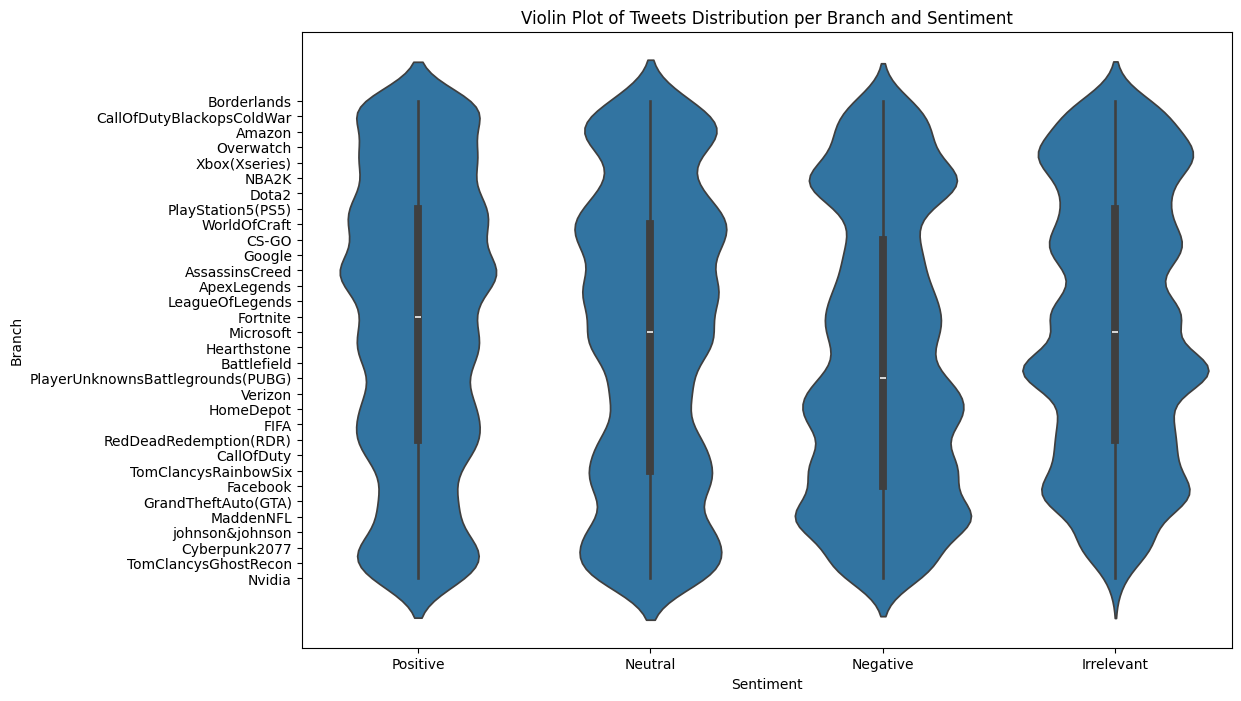

In [54]:
# Stwórz wykres skrzypcowy
plt.figure(figsize=(12, 8))  # Ustaw rozmiar wykresu
sns.violinplot(x='sentiment', y='type', data=train)  # Stwórz wykres skrzypcowy dla sentymentów i typów z danych
plt.title('Violin Plot of Tweets Distribution per Branch and Sentiment')  # Dodaj tytuł wykresu
plt.xlabel('Sentiment')  # Dodaj etykietę osi X
plt.ylabel('Branch')  # Dodaj etykietę osi Y
plt.show()  # Wyświetl wykres

## Analiza wykresu:
Wykres skrzypcowy przedstawia dystrybucję tweetów według typu (branch) i sentymentu. Oto kilka kluczowych obserwacji:

1. **Sentyment Pozytywny:**
   - Rozkłady są dość zróżnicowane, co sugeruje, że niektóre typy mają szeroki zakres tweetów o pozytywnym sentymencie.
   - Typy takie jak `Cyberpunk2077`, `LeagueOfLegends` i `MaddenNFL` mają wyraźnie widoczne szczyty, co wskazuje na większą koncentrację pozytywnych tweetów.

2. **Sentyment Neutralny:**
   - Większość typów ma bardziej symetryczne i rozłożone rozkłady w tej kategorii.
   - Typy takie jak `NBA2K` i `PlayStation5(PS5)` pokazują większą zmienność w liczbie neutralnych tweetów.

3. **Sentyment Negatywny:**
   - `MaddenNFL` wyróżnia się z wyraźnym szczytem, co sugeruje, że ten typ otrzymał znacznie więcej negatywnych tweetów niż inne.
   - Inne typy, takie jak `PlayerUnknownsBattlegrounds(PUBG)` i `TomClancysRainbowSix`, również mają szerokie rozkłady negatywnych tweetów.

4. **Sentyment Nierelewantny:**
   - Rozkłady są dość zróżnicowane w tej kategorii, z wyraźnymi szczytami dla typów takich jak `Battlefield`, `CallOfDuty` i `Fortnite`.
   - Typy takie jak `Amazon`, `ApexLegends` i `AssassinsCreed` mają bardziej rozłożone i symetryczne rozkłady.

**Wniosek:**
Wykres skrzypcowy dostarcza bardziej szczegółowego wglądu w dystrybucję tweetów według sentymentu dla różnych typów. Widać, że niektóre typy mają wyraźne szczyty, co wskazuje na większą koncentrację tweetów o określonym sentymencie, podczas gdy inne mają bardziej równomiernie rozłożone dystrybucje. To pomaga zrozumieć, jak różne typy są postrzegane przez użytkowników w różnych kontekstach sentymentów.

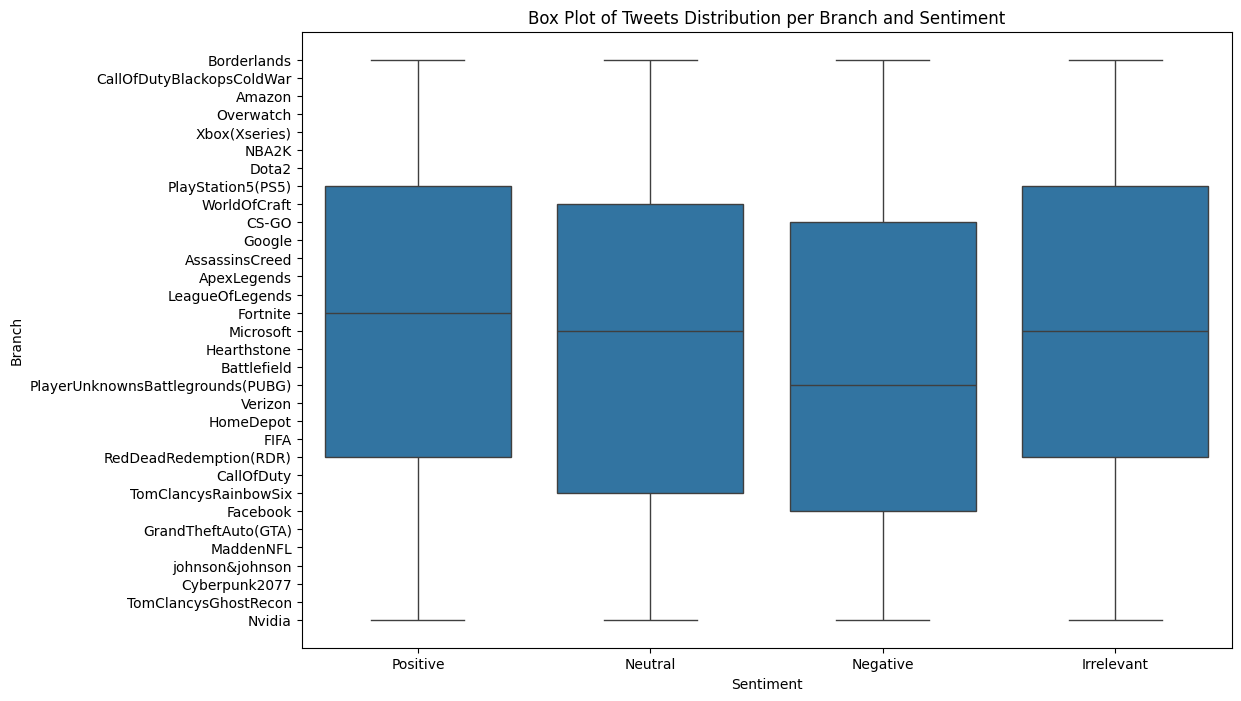

In [55]:
# Stwórz wykres pudełkowy
plt.figure(figsize=(12, 8))  # Ustaw rozmiar wykresu
sns.boxplot(x='sentiment', y='type', data=train)  # Stwórz wykres pudełkowy dla sentymentów i typów z danych
plt.title('Box Plot of Tweets Distribution per Branch and Sentiment')  # Dodaj tytuł wykresu
plt.xlabel('Sentiment')  # Dodaj etykietę osi X
plt.ylabel('Branch')  # Dodaj etykietę osi Y
plt.show()  # Wyświetl wykres

## Analiza wykresu:
Wykres pudełkowy przedstawia dystrybucję tweetów według typu (branch) i sentymentu. Oto kilka kluczowych obserwacji:

1. **Sentyment Pozytywny:**
   - Rozkład tweetów o pozytywnym sentymencie jest dość szeroki, co sugeruje zróżnicowaną liczbę pozytywnych tweetów w różnych typach.
   - Mediana (środkowa linia) dla większości typów jest stosunkowo niska, ale zakres tweetów jest szeroki.

2. **Sentyment Neutralny:**
   - Tweetów o neutralnym sentymencie jest stosunkowo dużo, z szerokim zakresem wartości.
   - Mediana tweetów jest nieco wyższa w tej kategorii, co sugeruje większą liczbę tweetów neutralnych w porównaniu do innych sentymentów.

3. **Sentyment Negatywny:**
   - Rozkład tweetów negatywnych jest również szeroki, z kilkoma wartościami odstającymi (outliers).
   - Typy takie jak `MaddenNFL` pokazują większe wartości negatywnych tweetów, co sugeruje większą liczbę tweetów negatywnych dla tego typu.

4. **Sentyment Nierelewantny:**
   - Tweetów nierelewantnych jest stosunkowo mniej, ale mają one szeroki zakres wartości.
   - Mediana tweetów w tej kategorii jest również niska, podobnie jak w przypadku pozytywnych tweetów.

**Wniosek:**
Wykres pudełkowy dostarcza szczegółowego wglądu w rozkład tweetów według sentymentu dla różnych typów. Widać, że liczba tweetów w poszczególnych kategoriach sentymentu jest zróżnicowana, z kilkoma typami mającymi wyraźne wartości odstające. To pomaga zrozumieć, jak różne typy są postrzegane przez użytkowników w różnych kontekstach sentymentów.

<Figure size 1600x1200 with 0 Axes>

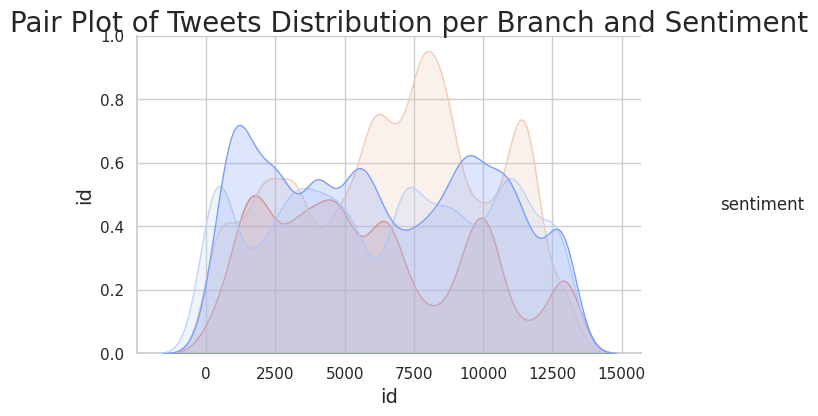

In [56]:
# Stwórz większy i bardziej czytelny pair plot
sns.set(style="whitegrid")

# Zwiększ rozmiar wykresu i dostosuj skalę
plt.figure(figsize=(16, 12))
pair_plot = sns.pairplot(train, hue='sentiment', palette='coolwarm', height=4, aspect=1.5)

# Dodaj tytuł i ustaw pozycję
pair_plot.fig.suptitle('Pair Plot of Tweets Distribution per Branch and Sentiment', y=1.02, fontsize=20)

# Dostosuj rozmiar czcionki etykiet osi
for ax in pair_plot.axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), fontsize=14)
    ax.set_ylabel(ax.get_ylabel(), fontsize=14)

# Wyświetl wykres
plt.show()

### Analiza wykresu:

Pair plot przedstawia gęstościową dystrybucję tweetów według sentymentu dla różnych typów (branch). Oto kilka kluczowych obserwacji:

1. **Gęstość tweetów:**
   - Wykres pokazuje nakładające się dystrybucje tweetów dla różnych sentymentów. 
   - Gęstości dla tweetów o różnych sentymentach mają podobny kształt, co wskazuje, że liczba tweetów jest zbliżona w różnych przedziałach ID.

2. **Różnice w sentymentach:**
   - Kolory reprezentujące różne sentymenty (pozytywne, negatywne, neutralne, nierelewantne) pokazują różnice w ich rozkładach. 
   - Można zauważyć, że niektóre sentymenty mają wyższe szczyty w określonych przedziałach, co może wskazywać na wyższe zaangażowanie użytkowników w tych przedziałach.

3. **Zakres wartości:**
   - Rozkłady wartości ID tweetów mają szeroki zakres, od 0 do około 15000. 
   - Większość gęstości tweetów koncentruje się w przedziale od 0 do 10000, co sugeruje, że największa liczba tweetów jest w tym zakresie.

4. **Szczyty gęstości:**
   - Szczyty gęstości dla różnych sentymentów wskazują, że w pewnych przedziałach ID tweetów jeden sentyment może dominować nad innymi. 
   - Na przykład, sentyment pozytywny (czerwony) ma wyraźny szczyt w okolicach ID 7500, podczas gdy inne sentymenty mają bardziej równomierne rozkłady.

**Wniosek:**
Wykres pair plot dostarcza wizualnej reprezentacji gęstości tweetów w zależności od ID i sentymentu. Poprzez analizę tych dystrybucji można zauważyć, że różne sentymenty mają podobne ogólne kształty rozkładów, ale różnią się szczegółami, takimi jak szczyty gęstości w określonych przedziałach. Zrozumienie tych wzorców może pomóc w analizie zaangażowania użytkowników i ich reakcji na różne typy treści.

In [57]:
# Zmień nazwy kolumn
train.columns = ['id', 'type', 'sentiment', 'text']

# Policzenie liczby tweetów dla każdej marki
brand_tweet_counts = train['type'].value_counts()

# Wyświetlenie liczby tweetów dla każdej marki
print(f'Liczba tweetów dla każdej marki: {brand_tweet_counts}')

# Określenie zakresu wartości x
x = np.arange(brand_tweet_counts.min(), brand_tweet_counts.max())

Liczba tweetów dla każdej marki: type
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2

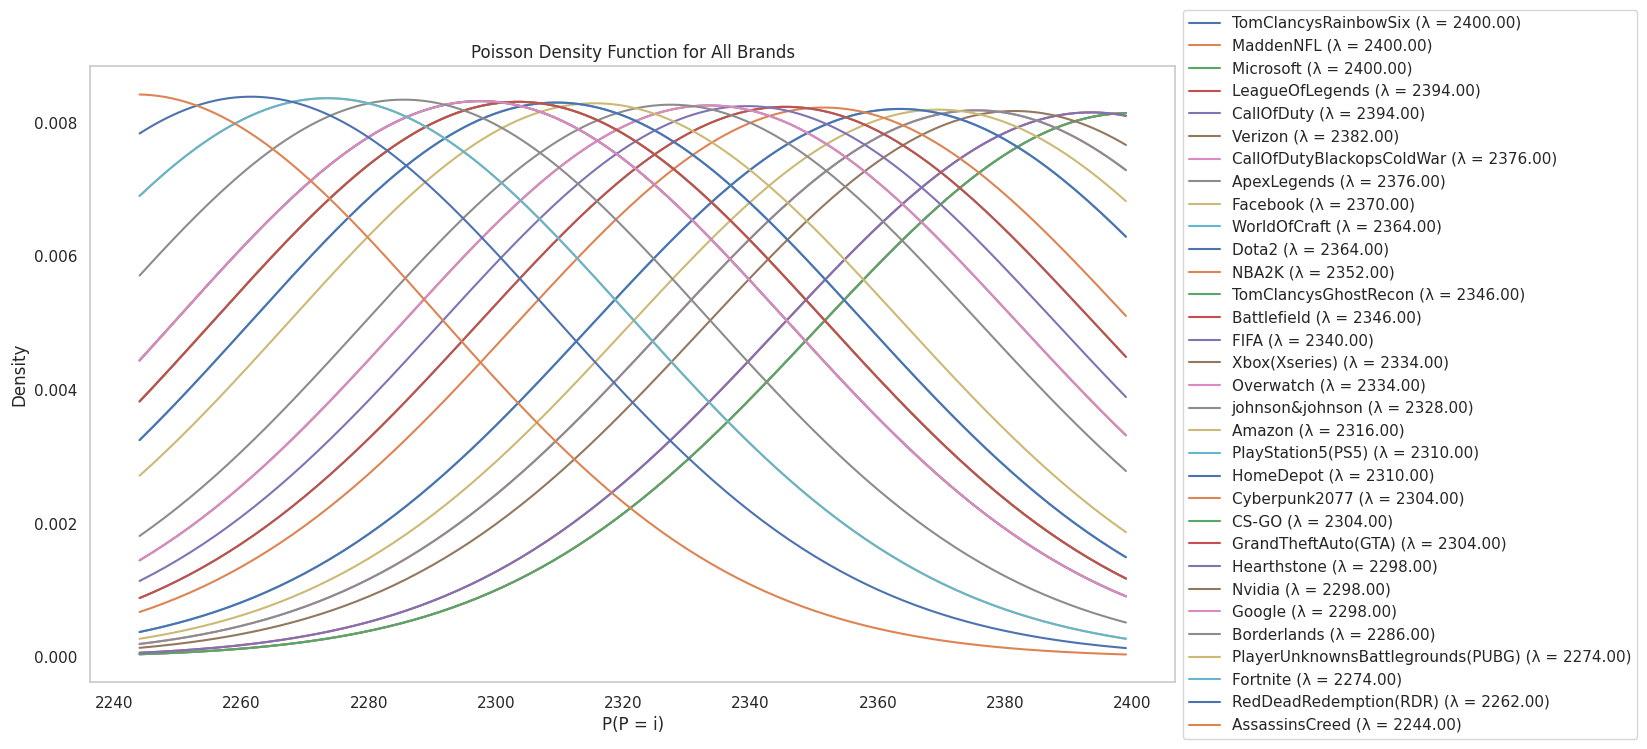

In [58]:
# Wykres 1: Funkcja gęstości Poissona dla wszystkich marek
plt.figure(figsize=(14, 8))  # Ustaw rozmiar wykresu

# Rysowanie funkcji gęstości Poissona dla każdej marki
for brand, lambda_val in brand_tweet_counts.items():
    pmf = stats.poisson.pmf(x, lambda_val)  # Oblicz gęstość prawdopodobieństwa Poissona
    plt.plot(x, pmf, linestyle='-', label=f'{brand} (λ = {lambda_val:.2f})')  # Narysuj wykres gęstości prawdopodobieństwa

# Ustawienia wykresu
plt.title('Poisson Density Function for All Brands')  # Dodaj tytuł wykresu
plt.xlabel('P(P = i)')  # Dodaj etykietę osi X
plt.ylabel('Density')  # Dodaj etykietę osi Y
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Dodaj legendę z boku
plt.grid()  # Dodaj siatkę do wykresu
plt.savefig('poisson_density_function.svg', format='svg', bbox_inches='tight')  # Zapisanie wykresu jako SVG
plt.show()  # Wyświetl wykres

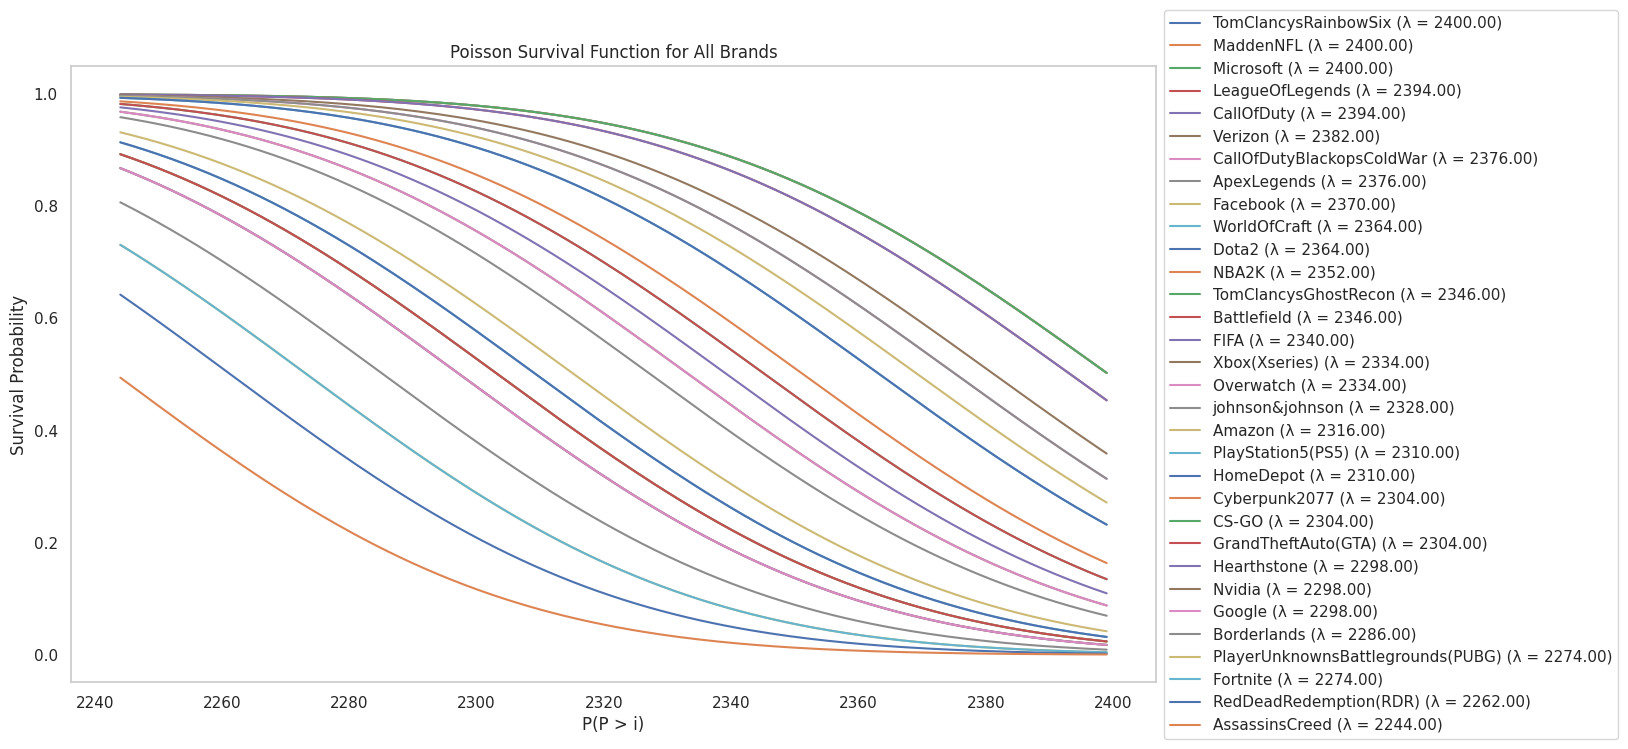

In [59]:
# Wykres 2: Funkcja przeżycia Poissona dla wszystkich marek
plt.figure(figsize=(14, 8))  # Ustaw rozmiar wykresu

# Rysowanie funkcji przeżycia Poissona dla każdej marki
for brand, lambda_val in brand_tweet_counts.items():
    sf = stats.poisson.sf(x, lambda_val)  # Oblicz funkcję przeżycia Poissona
    plt.plot(x, sf, linestyle='-', label=f'{brand} (λ = {lambda_val:.2f})')  # Narysuj wykres funkcji przeżycia

# Ustawienia wykresu
plt.title('Poisson Survival Function for All Brands')  # Dodaj tytuł wykresu
plt.xlabel('P(P > i)')  # Dodaj etykietę osi X
plt.ylabel('Survival Probability')  # Dodaj etykietę osi Y
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # Dodaj legendę z boku
plt.grid()  # Dodaj siatkę do wykresu
plt.savefig('poisson_survival_function.svg', format='svg', bbox_inches='tight')  # Zapisanie wykresu jako SVG
plt.show()  # Wyświetl wykres

### Analiza wykresów

#### Wykres 1: Funkcja gęstości Poissona dla wszystkich marek

- **Opis:** Wykres przedstawia funkcje gęstości Poissona dla różnych marek. Oś x reprezentuje liczbę tweetów, a oś y reprezentuje gęstość prawdopodobieństwa.
- **Interpretacja:**
  - Każda krzywa reprezentuje jedną markę z różnym lambda (średnią liczbą tweetów).
  - Wysokie wartości lambda prowadzą do bardziej rozłożonych rozkładów z większą liczbą tweetów.
  - Krzywe mają tendencję do zbiegania się w pewnym punkcie, co wskazuje na podobieństwo rozkładów dla niektórych marek.

#### Wykres 2: Funkcja przeżycia Poissona dla wszystkich marek

- **Opis:** Wykres przedstawia funkcje przeżycia Poissona dla różnych marek. Oś x reprezentuje liczbę tweetów, a oś y reprezentuje prawdopodobieństwo przeżycia.
- **Interpretacja:**
  - Każda krzywa reprezentuje jedną markę z różnym lambda (średnią liczbą tweetów).
  - Funkcja przeżycia pokazuje prawdopodobieństwo, że liczba tweetów będzie większa niż określona wartość.
  - Krzywe o wysokim lambda szybciej opadają, co oznacza, że prawdopodobieństwo uzyskania wysokiej liczby tweetów maleje szybciej dla marek z większą średnią liczbą tweetów.

### Wnioski

- **Rozkład tweetów:** Rozkłady Poissona pokazują, jak różne marki są postrzegane przez użytkowników Twittera. Marki z wyższą średnią liczbą tweetów mają bardziej rozłożone rozkłady.
- **Prawdopodobieństwo przeżycia:** Funkcje przeżycia pomagają zrozumieć, jak prawdopodobieństwo zmienia się dla różnych liczb tweetów. Marki z wyższą średnią mają niższe prawdopodobieństwo uzyskania bardzo wysokich liczb tweetów.
- **Porównanie marek:** Porównując krzywe dla różnych marek, można zobaczyć, które marki mają bardziej zaangażowaną bazę użytkowników na Twitterze. Marki z bardziej strome krzywe (np. `MaddenNFL`, `Microsoft`) mają bardziej skoncentrowane rozkłady tweetów.